# **6b. EJERCICIO COMPLETO**

**<u>TEORÍA</u>**

**Clave principal:** <span style="color: var(--vscode-foreground);">Una clave principal es un campo de una tabla que identifica de forma única&nbsp;</span>  <span style="color: var(--vscode-foreground);">cada registro de la tabla. En las bases de datos relacionales, l</span><span style="color: var(--vscode-foreground);">as claves se pueden usar como campos para unir tablas.</span>

**Clave externa** o <span style="color: var(--vscode-foreground);"><b>clave foránea</b> es un campo de una tabla que hace referencia a la&nbsp;</span>  <span style="color: var(--vscode-foreground);">clave principal de otra tabla. En una base de datos relacional, u</span><span style="color: var(--vscode-foreground);">na forma de unir dos tablas es conectando el&nbsp;</span>  <span style="color: var(--vscode-foreground);">de una tabla a la clave principal de otra.</span>

**Relación uno a uno:** <span style="color: var(--vscode-foreground);">Las relaciones de base de datos describen las relaciones&nbsp;</span>  <span style="color: var(--vscode-foreground);">entre registros en diferentes tablas. Cuando una relación one-to-one existe</span>  <span style="color: var(--vscode-foreground);">&nbsp;entre dos tablas, un registro dado en u</span><span style="color: var(--vscode-foreground);">na tabla está relacionada de forma única con exactamente un registro en el archivo o</span><span style="color: var(--vscode-foreground);">tra tabla.</span>

**Relación de uno a varios**: e<span style="color: var(--vscode-foreground);">n una relación de uno a varios, un registro de una tabla puede&nbsp;</span>  <span style="color: var(--vscode-foreground);">estar relacionado con uno o más registros de una segunda tabla.&nbsp;</span>  <span style="color: var(--vscode-foreground);">Sin embargo, un registro dado en la segunda tabla solo será&nbsp;</span>  <span style="color: var(--vscode-foreground);">relacionado con un registro de la primera tabla.</span>

**Relación de varios a varios**: <span style="color: var(--vscode-foreground);">En una relación de varios a varios, los registros de una tabla A determinada se pueden relacionar con uno o más registros de otra tabla B,&nbsp;</span>  <span style="color: var(--vscode-foreground);">y los registros de la tabla B también se pueden relacionar con muchos registros de la tabla A</span>

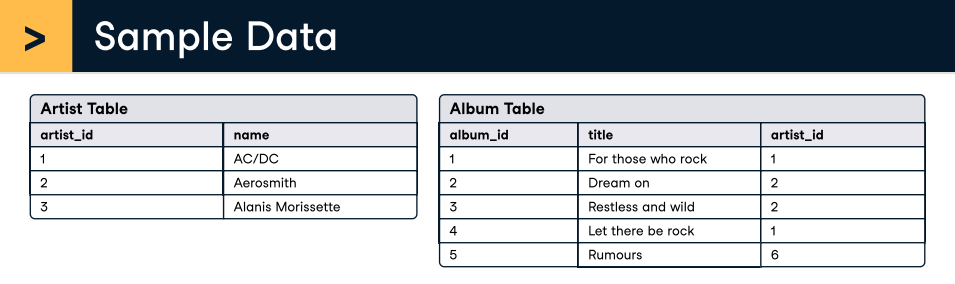

In [8]:
USE practica6;

Commands completed successfully

Total execution time: 00:00:00.001

In [9]:
CREATE TABLE Artist (
artist_id INT NOT NULL PRIMARY KEY,
name_ VARCHAR(20) NOT NULL
);

CREATE TABLE Album (
album_id INT NOT NULL,
title VARCHAR(40) NOT NULL,
artist_id INT NOT NULL
);

Commands completed successfully

Commands completed successfully

Total execution time: 00:00:00.063

In [11]:
INSERT INTO Artist (artist_id,name_)
VALUES (1,'AC/DC'),(2,'Aerosmith'),(3,'Alanis Morissette')

Commands completed successfully

Total execution time: 00:00:00.014

In [12]:
INSERT INTO Album (album_id,title,artist_id)
VALUES (1,'For those who rock', 1),(2,'Dream on',2),(3,'Restless and wild',2),(4,'Let there be rock',1),(5,'Rumours',6);

Commands completed successfully

Total execution time: 00:00:00.023

## **Tablas creadas**

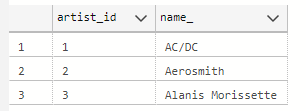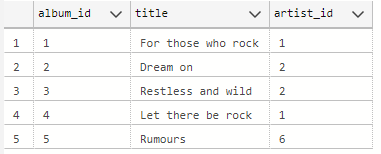

**INNER JOIN:** Una combinación interna entre dos tablas nos dará solo los registros en los que un joining field (por ejemplo: una clave) encuentre una coincidencia en ambas tablas.

In [15]:
SELECT * FROM practica6.artist a JOIN practica6.album b ON a.artist_id=b.artist_id ORDER BY a.artist_id;

(4 row(s) affected)

Total execution time: 00:00:01.005

artist_id,name_,album_id,title,artist_id
1,AC/DC,1,For those who rock,1
1,AC/DC,4,Let there be rock,1
2,Aerosmith,2,Dream on,2
2,Aerosmith,3,Restless and wild,2


**SELF JOIN:** se usa para comparar valores en diferentes columnas de la misma tabla. Une diferentes partes de la tabla en uno.

In [16]:
SELECT*FROM a,b SELF JOIN

Total execution time: 00:00:00.001

: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '' at line 1

**LEFT JOIN:** mantiene los registros originales de la tabla izquierda y une sólo los valores de la tabla derecha que coinciden, dejando como valores faltantes en aquellos que no coinciden.

In [19]:
SELECT*FROM practica6.artist a LEFT JOIN practica6.album b ON a.artist_id=b.artist_id;

(5 row(s) affected)

Total execution time: 00:00:01.024

artist_id,name_,album_id,title,artist_id
1,AC/DC,4,Let there be rock,1
1,AC/DC,1,For those who rock,1
2,Aerosmith,3,Restless and wild,2
2,Aerosmith,2,Dream on,2
3,Alanis Morissette,NULL,NULL,NULL


**RIGHT JOIN:** Lo mismo que Left Join pero manteniendo los valores originales de la tabla derecha.

In [20]:
SELECT*FROM practica6.artist a RIght JOIN practica6.album b ON a.artist_id=b.artist_id;

(5 row(s) affected)

Total execution time: 00:00:01.015

artist_id,name_,album_id,title,artist_id
1,AC/DC,1,For those who rock,1
2,Aerosmith,2,Dream on,2
2,Aerosmith,3,Restless and wild,2
1,AC/DC,4,Let there be rock,1
NULL,NULL,5,Rumours,6


**FULL JOIN:** Une ambas tablas, combina left join y right join, independientemente de si hay o no match en la columna de unión en la otra tabla (_Mi MySQL no me reconoce FULL JOIN o FULL OUTER JOIN, pero lo solucionamos con_ **_<u>LEFT JOIN UNION RIGHT JOIN</u>_**_)._

**UNION:** combina verticalmente los resultados de dos instrucciones. Para que funcione sin errores, todas las instrucciones deben tener el mismo número de columnas y las columnas correspondientes deben tener el mismo tipo de datos. "UNION" no devuelve duplicados.

**UNION ALL:** El operador funciona igual que UNION, pero devuelve valores duplicados. Las mismas restricciones de UNION son válidas para UNION ALL.

In [29]:
SELECT*FROM practica6.artist a RIGHT JOIN practica6.album b ON a.artist_id=b.artist_id
UNION ALL 
SELECT*FROM practica6.artist a RIGHT JOIN practica6.album b ON a.artist_id=b.artist_id ORDER BY name_ DESC;

(10 row(s) affected)

Total execution time: 00:00:01.004

artist_id,name_,album_id,title,artist_id
2,Aerosmith,2,Dream on,2
2,Aerosmith,3,Restless and wild,2
2,Aerosmith,2,Dream on,2
2,Aerosmith,3,Restless and wild,2
1,AC/DC,1,For those who rock,1
1,AC/DC,4,Let there be rock,1
1,AC/DC,1,For those who rock,1
1,AC/DC,4,Let there be rock,1
NULL,NULL,5,Rumours,6
NULL,NULL,5,Rumours,6


In [42]:
SELECT artist_id FROM practica6.artist
UNION 
SELECT artist_id FROM practica6.album;

(4 row(s) affected)

Total execution time: 00:00:01.007

artist_id
1
2
3
6


In [49]:
SELECT artist_id,name_ FROM practica6.artist
UNION ALL
SELECT artist_id,title FROM practica6.album;

(8 row(s) affected)

Total execution time: 00:00:01.010

artist_id,name_
1,AC/DC
2,Aerosmith
3,Alanis Morissette
1,For those who rock
2,Dream on
2,Restless and wild
1,Let there be rock
6,Rumours


_**Ejemplo de que es necesario que tengan mismo número de columnas:**_

In [45]:
SELECT * FROM practica6.artist
UNION
SELECT * FROM practica6.album;

Total execution time: 00:00:00

: 1222 (21000): The used SELECT statements have a different number of columns

**CROSS JOIN:** crea todas las posibles conbinaciones de dos tablas y no requiere la clausula "ON".

In [48]:
SELECT*FROM artist
CROSS JOIN album;

(15 row(s) affected)

Total execution time: 00:00:01.017

artist_id,name_,album_id,title,artist_id
3,Alanis Morissette,1,For those who rock,1
2,Aerosmith,1,For those who rock,1
1,AC/DC,1,For those who rock,1
3,Alanis Morissette,2,Dream on,2
2,Aerosmith,2,Dream on,2
1,AC/DC,2,Dream on,2
3,Alanis Morissette,3,Restless and wild,2
2,Aerosmith,3,Restless and wild,2
1,AC/DC,3,Restless and wild,2
3,Alanis Morissette,4,Let there be rock,1


**INTERSECT:** solo devuelve líneas idénticas de dos tablas. <u>Deben tener mismo nº de columnas.</u> Y para que devuelva algo, la fila ENTERA (si la final tiene dos columnas, pues las dos) deben ser idénticas en ambas tablas.

**EXCEPT**: solo devuelve las líneas de la tabla izq que no están presentes en la tabla derecha. <u>Debe tener misno nº de columnas.</u>

(o seleccionar el nº que queramos).

In [52]:
select artist_id,name_ from artist INTERSECT SELECT album_id,title from album;

(0 row(s) affected)

Total execution time: 00:00:01.007

artist_id,name_


In [54]:
select artist_id from artist INTERSECT SELECT artist_id from album;

(2 row(s) affected)

Total execution time: 00:00:01.002

artist_id
1
2


In [56]:
SELECT artist_id from artist EXCEPT select artist_id from album;

(1 row(s) affected)

Total execution time: 00:00:01.013

artist_id
3


**SEMI JOIN:** elige los registros de la primera tabla cuya condición se cumple en la segunda tabla. Usa WHERE.

  

**ANTI JOIN:** escoge los registros de la primera tabla donde la condición NO se cumple en la segunda tabla. Usa la cláusula WHERE.

In [57]:
SELECT * from album WHERE artist_id IN (select artist_id from artist)

(4 row(s) affected)

Total execution time: 00:00:01.012

album_id,title,artist_id
1,For those who rock,1
2,Dream on,2
3,Restless and wild,2
4,Let there be rock,1


In [60]:
SELECT * from album where artist_id NOT IN (Select artist_id from artist)

(1 row(s) affected)

Total execution time: 00:00:01.009

album_id,title,artist_id
5,Rumours,6


**Muchas gracias por checkear estos apuntes/ejercicios.**

**\-Irene S.L.**